# Write A Data Science Blog Post Project (Seattle AirBNB Data)
## by    Rajaa Rahil

## Introduction
>Airbnb company (Air Bed and Breakfast) is an American marketplace for lodging founded in 2008 and covered wide places around the world. Besides the services, Airbnb provides protection for guests and hosts. There is some criticism of the company due to the potential for increasing home rents and disturbing neighbors who live near rental properties.[Wiki](https://en.wikipedia.org/wiki/Airbnb)

>Seattle [AirBNB Dataset](https://www.kaggle.com/airbnb/seattle/data) consists of three tables:
>- Listings: consists of 3818 instances and 92 features (variables) including full descriptions.
>- Reviews: consists of 84849 instances and 6 features (variables) including reviewer information.
>- Calendar: consists of 1393570 instances and 4 features (variables) including the availability and price in each day, as well as the list id.  
In this project, we will focus on the key features that we consider to be related to our sights.

## Our insights:
The questions were highlighted during investigating and analyzing the dataset.

Does the host respond to the guest on time for the booking? <br/>
Does host response time affect the average price?<br/>
Is the host a super host?<br/>
What are the favorite neighborhoods by guests in Seattle?<br/>
Do neighborhood locations affect the average price?<br/>
What type of property is most demanded by the guest? <br/>
Does the property type affect the average price?<br/>
What type of room is most demanded by the guest?<br/> 
Does the room type affect the average price?<br/>
What are the cancellation policy types in Seattle? <br/>
Does the cancellation policy type affect the average price?<br/>
What is the average price trend throughout the year (2016)?<br/>
Is the availability of properties affected in the peak period?<br/>

In [3]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Wrangling Data 

In [4]:
# load in the dataset into a pandas dataframe
df_listining = pd.read_csv('listings.csv')
df_review = pd.read_csv('reviews.csv')
df_calendar = pd.read_csv('calendar.csv')

### Assessing And Cleaning Data

In [5]:
df_listining.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df_listining.shape

(3818, 92)

In [7]:
df_listining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
# Check for the duplicate id
df_listining.id.duplicated().sum()

0

In [9]:
df_review.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
df_review.shape

(84849, 6)

In [11]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [12]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
df_calendar.shape

(1393570, 4)

In [14]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [15]:
# Copy the data set
df_list =df_listining.copy()

In [16]:
df_list.city.value_counts()

Seattle                  3810
Seattle                     2
West Seattle                2
Ballard, Seattle            1
seattle                     1
Phinney Ridge Seattle       1
西雅图                         1
Name: city, dtype: int64

In [17]:
# Capitalize each city name and remove the space from the end of the word.
df_list['city'] = df_list['city'].str.rstrip().str.title()
df_list.city.value_counts()

Seattle                  3813
West Seattle                2
Ballard, Seattle            1
Phinney Ridge Seattle       1
西雅图                         1
Name: city, dtype: int64

In [18]:
# Remove any city does not contain (Seattle)
df_list = df_list[df_list['city'].str.contains('Seattle')]
df_list['city'].value_counts()

Seattle                  3813
West Seattle                2
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [19]:
df_list.price.value_counts(30)

$150.00    0.042442
$100.00    0.041656
$75.00     0.030914
$99.00     0.028818
$95.00     0.028818
             ...   
$172.00    0.000262
$420.00    0.000262
$232.00    0.000262
$269.00    0.000262
$360.00    0.000262
Name: price, Length: 273, dtype: float64

In [20]:
# Remove ($) and (,) symbols from the price 
# https://pbpython.com/currency-cleanup.html
def change_price(p):
    if isinstance(p, str):
        return (p.replace(',','').replace('$',''))
    else:
        return p

In [21]:
# Clean all price columns and change the type 
all_prices = ['price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'security_deposit']

for item in all_prices:
    df_list[item] = df_list[item].apply(change_price).astype('float')

In [22]:
df_list.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3817, dtype: float64

In [23]:
df_list.monthly_price.dtypes

dtype('float64')

In [24]:
df_list.groupby('host_response_time').mean()['price'].sort_values(ascending= False)

host_response_time
within a few hours    133.824380
within a day          132.819095
a few days or more    129.157895
within an hour        116.405086
Name: price, dtype: float64

Calculate the percentage of missing value in the entire dataframe


In [25]:
#Check number of columns that contain more than 75% of missing values.
(df_list.isnull().sum()/df_list.shape[0] > 0.75).sum()

2

In [26]:
# Select the columns that contain more than 75% of missing values.
mss_col = df_list.columns[df_list.isnull().sum()/df_list.shape[0] > 0.75]
print (mss_col,df_list.shape[1] )

Index(['square_feet', 'license'], dtype='object') 92


In [27]:
# Drop the columns that contain more than 75% of missing values.
df_list = df_list.drop(mss_col, axis=1)
print (df_list.shape[1] )

90


In [28]:
# Check if there is any entire column contain the same value.
unq_col= []
for col in df_list.columns:
    if (len(df_list[col].unique()) == 1):
        unq_col.append(col)

In [29]:
unq_col

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'jurisdiction_names']

In [30]:
df_list.scrape_id.value_counts()

20160104002432    3817
Name: scrape_id, dtype: int64

In [31]:
# Drop the columns that contain the same value.
df_list.drop(unq_col, axis=1, inplace= True)
print (df_list.shape[1] )

80


Drop uninterested columns - Categorical and Numeric columns.

In [32]:
# Subset to a dataframe only holding the categorical columns
cat_list_raw = df_list.select_dtypes(include=['object']).columns
cat_list_raw

Index(['listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'extra_people', 'calendar_updated',
       'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [33]:
# Select useful categorical columns.
cat_list_usfl = ['host_response_time','host_is_superhost', 'neighbourhood_group_cleansed','property_type', 
                'room_type', 'bed_type', 'cancellation_policy']

# Select unuseful categorical columns for dropping.
cat_list_drp = [i for i in cat_list_raw if i not in cat_list_usfl]

df_list.drop(cat_list_drp, axis=1, inplace= True)

In [34]:
# Subset to a dataframe only holding the numeric columns
num_list_raw = df_list.select_dtypes(include=['int64', 'float64']).columns
num_list_raw

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [35]:
# Select useful numeric columns.
num_list_usfl = ['bathrooms', 'bedrooms','beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
                'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_communication', 'review_scores_location']

# Select unuseful numeric columns for dropping.
num_list_drp = [j for j in num_list_raw if j not in num_list_usfl]

df_list.drop(num_list_drp, axis=1, inplace= True)

In [36]:
df_list.columns

Index(['host_response_time', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'cancellation_policy'],
      dtype='object')

In [37]:
df_list.isnull().sum()

host_response_time               523
host_is_superhost                  2
neighbourhood_group_cleansed       0
property_type                      1
room_type                          0
bathrooms                         16
bedrooms                           6
beds                               1
bed_type                           0
price                              0
weekly_price                    1808
monthly_price                   2300
security_deposit                1951
cleaning_fee                    1029
review_scores_rating             647
review_scores_accuracy           658
review_scores_cleanliness        653
review_scores_communication      651
review_scores_location           655
cancellation_policy                0
dtype: int64

In [38]:
# Drop the rows with missing values in host_response_time, 'property_type' and 'beds' columns.
df_list = df_list.dropna(subset= ['host_response_time', 'property_type', 'beds'])

In [39]:
df_list.isnull().sum()

host_response_time                 0
host_is_superhost                  0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
bathrooms                         13
bedrooms                           6
beds                               0
bed_type                           0
price                              0
weekly_price                    1506
monthly_price                   1896
security_deposit                1636
cleaning_fee                     812
review_scores_rating             434
review_scores_accuracy           441
review_scores_cleanliness        436
review_scores_communication      435
review_scores_location           439
cancellation_policy                0
dtype: int64

- We didn't find a reasonable relation between the ['weekly_price', 'monthly_price','security_deposit','cleaning_fee'] columns to recalculate their missed values; we have to fill the coulumns with zero.
- Fill the review columns with 0.
- In general, any property has at least one bathroom, so we'll fill in the missing value in the Bathrooms column with one.

In [40]:
review_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication',
              'review_scores_location','weekly_price', 'monthly_price','security_deposit','cleaning_fee','bedrooms']

df_list[review_cols] = df_list[review_cols].fillna(0)
df_list['bathrooms'] = df_list['bathrooms'].fillna(1)

In [41]:
df_list.isnull().sum()

host_response_time              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
price                           0
weekly_price                    0
monthly_price                   0
security_deposit                0
cleaning_fee                    0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_communication     0
review_scores_location          0
cancellation_policy             0
dtype: int64

In [42]:
# Dividing the (review_scores_rating) column values by 10
df_list['review_scores_rating'] = df_list['review_scores_rating'] / 10

In [43]:
df_list.bedrooms.value_counts()

1.0    2077
2.0     571
0.0     331
3.0     236
4.0      51
5.0      20
6.0       5
7.0       1
Name: bedrooms, dtype: int64

## Visualization

#### Does the host respond to the guest on time for the booking?

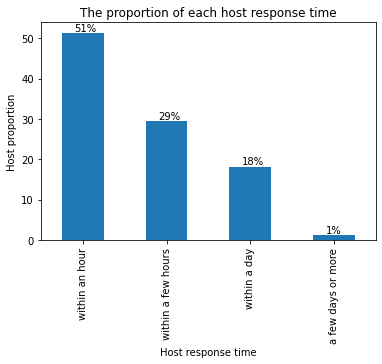

In [44]:
# Provide the proportion of each host response time

#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

#reset parameters
#plt.rcParams.update(plt.rcParamsDefault)

host_resp = df_list.host_response_time.value_counts()
ax1 = (host_resp/df_list.shape[0]* 100).plot(kind="bar")

for i in ax1.patches:
    ax1.annotate(str(round(i.get_height()))+'%', (i.get_x() +.15, i.get_height()+0.5))
    
plt.title("The proportion of each host response time")
plt.xlabel('Host response time')
plt.ylabel('Host proportion');

About 50% of hosts responded within an hour, 29% of them responded within a few hours, 18% responded within a day, and 1% took a few days or more to response.

####  Does host response time affect the average price?

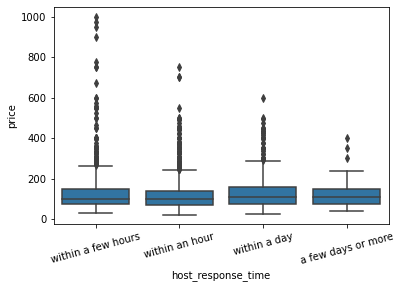

In [45]:
#Check the effect of host_response_time factor on the average of price.

# reset parameters
#plt.rcParams.update(plt.rcParamsDefault)

# Choosing the first tuple of RGB colors.
base_color = sns.color_palette()[0]

sns.boxplot(data = df_list, x='host_response_time', y='price', color=base_color)
plt.xticks(rotation=15);

Compared with the previous result, we can notice that the outliers made a difference in the result. There is no a significant difference between them. The majority of hosts respond within a day and within a few house.  

#### Is the host a super host?

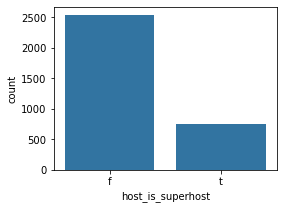

In [46]:
#Provide the counts host status.
plt.figure(figsize=[4,3])
sns.countplot(data=df_list, x='host_is_superhost', color=base_color);

In [47]:
df_list['host_is_superhost'].value_counts()

f    2547
t     745
Name: host_is_superhost, dtype: int64

The majority of hosts are categorized as non-superhost.

#### What are the favorite neighborhoods by guests in Seattle?

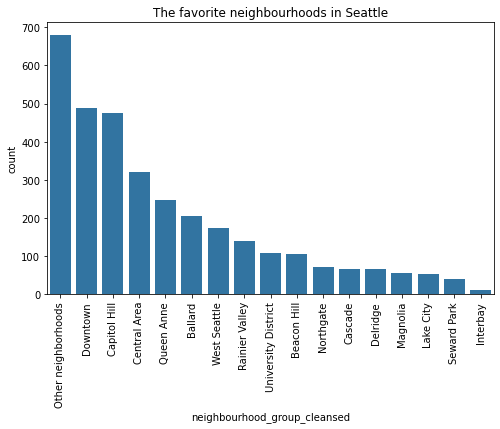

In [48]:
# The favorite neighbourhoods in Seatle.
plt.figure(figsize = [8,5])
# Choosing the first tuple of RGB colors.
base_color = sns.color_palette()[0]

# displaying the descending order of the bars of the frequency of each unique value in the 'neighbourhood_group_cleansed'
#column.
new_order = df_list.neighbourhood_group_cleansed.value_counts().index
sns.countplot(data = df_list, x= 'neighbourhood_group_cleansed', color=base_color, order = new_order)
plt.title("The favorite neighbourhoods in Seattle")
plt.xticks(rotation = 90);

- The most popular neighborhoods in Seattle are Downtown and Capitol Hill. The Central District and Queen Anne neighborhoods have a good number to be preferred.
- The less popular neighbourhoods in Seattle is Interbay, as well as Northgate, Cascade, Delridge, Magnolia, Lake City, and Seward Park scored are less favorite neighbourhoods.

 #### Do neighborhood locations affect the average price?

Text(0.5, 0, 'Average price ($)')

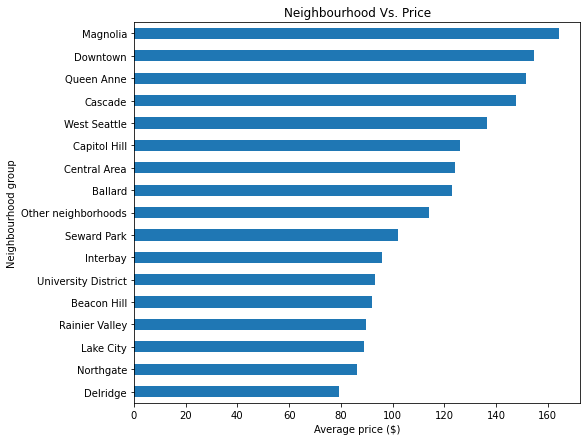

In [49]:
# The effect of neighbourhoods on average price
plt.figure(figsize = [8,7])
df_list.groupby('neighbourhood_group_cleansed').mean()['price'].sort_values().plot(kind = 'barh')
plt.title("Neighbourhood Vs. Price")
plt.ylabel("Neighbourhood group")
plt.xlabel("Average price ($)")

Magnolia, Downtown and Queen Anne neighborhoods are the  most influential on rental price. On the other hand, Delridge, Northgate, and Lake City neighborhoods have less impact on the rental price.

#### What type of property is most demanded by the guest?  Does the property type affect the average price?

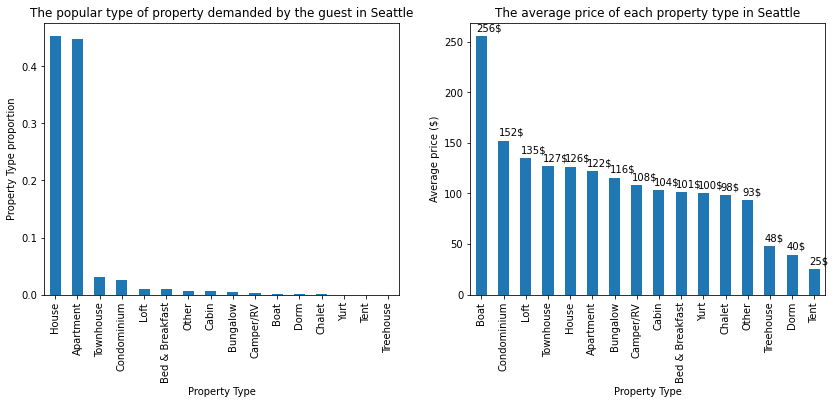

In [50]:
# The favorite property type in Seatle.
plt.figure(figsize = [14,5])

plt.subplot(1,2,1)

pro_typ = df_list.property_type.value_counts()
(pro_typ/df_list.shape[0]).plot(kind="bar")
plt.title("The popular type of property demanded by the guest in Seattle")
plt.xlabel('Property Type')
plt.ylabel('Property Type proportion');

# The effect of neighbourhoods on average price
plt.subplot(1, 2, 2)
ax = df_list.groupby('property_type').mean()['price'].sort_values(ascending = False).plot(kind = 'bar')

for i in ax.patches:
    ax.annotate(str(round(i.get_height()))+'$', (i.get_x() +.02, i.get_height()+5))
    
plt.title("The average price of each property type in Seattle")
plt.xlabel("Property Type")
plt.ylabel("Average price ($)");

About 45% of guests prefer to rent a house or apartment.
The boat is the most expensive rental property of all types and the tent is the cheapest. Townhouse, House, Apartment, Bungalow almost have the same average price although Bungalow is not preferred by guests.

#### What type of room is most demanded by the guest?  Does the room type affect the average price?

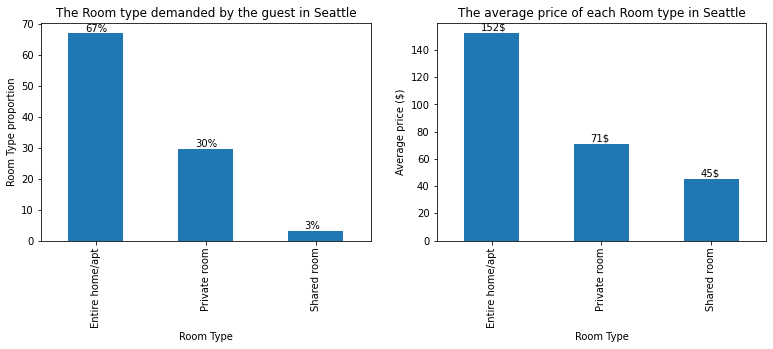

In [51]:
# The favorite room type in Seatle.
plt.figure(figsize = [13,4])

plt.subplot(1,2,1)

room_typ = df_list.room_type.value_counts()
ax3 = (room_typ/df_list.shape[0]*100).plot(kind="bar")

for i in ax3.patches:
    ax3.annotate(str(round(i.get_height()))+'%', (i.get_x() +.15, i.get_height()+0.5))

plt.title("The Room type demanded by the guest in Seattle")
plt.xlabel('Room Type')
plt.ylabel('Room Type proportion');

# The effect of room type on the average price.
plt.subplot(1, 2, 2)
ax = df_list.groupby('room_type').mean()['price'].sort_values(ascending=False).plot(kind = 'bar')

for i in ax.patches:
    ax.annotate(str(round(i.get_height()))+'$', (i.get_x() +.15, i.get_height()+2))
    
plt.title("The average price of each Room type in Seattle")
plt.xlabel("Room Type")
plt.ylabel("Average price ($)");

About 67% of guests prefer to rent an entire house or apartment, 30% of guests prefer to rent a private room, and 3% of them prefer a shared room. The entire house or apartment is the most expensive rental property than the other types and the shared room is the cheapest one.

#### What are the cancellation policy types in Seattle?  Does the cancellation policy type affect the average price?

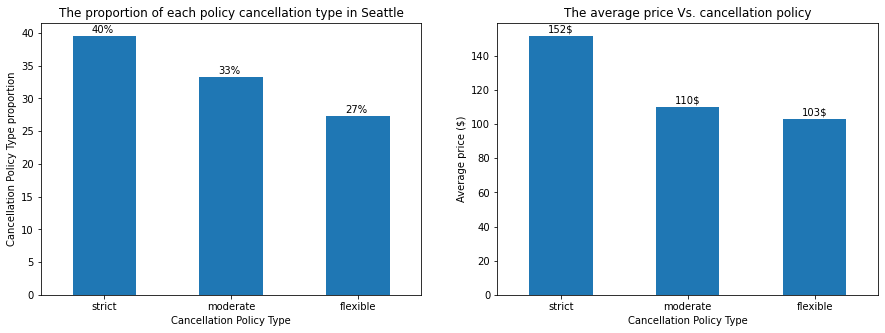

In [52]:
# The effect of cancellation policy on average price

#plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize = [15,5])
plt.subplot(1,2,1)

pol_type = df_list.cancellation_policy.value_counts()
ax2 = (pol_type/df_list.shape[0] * 100).plot(kind="bar");

for i in ax2.patches:
    ax2.annotate(str(round(i.get_height()))+'%', (i.get_x() +.15, i.get_height()+0.5))
    
plt.title("The proportion of each policy cancellation type in Seattle")
plt.xlabel('Cancellation Policy Type')
plt.ylabel('Cancellation Policy Type proportion')
plt.xticks(rotation=0);

plt.subplot(1,2,2)
ax = df_list.groupby('cancellation_policy').mean()['price'].sort_values(ascending=False).plot(kind = 'bar')

for i in ax.patches:
    ax.annotate(str(round(i.get_height()))+'$', (i.get_x() +.15, i.get_height()+2))
    
plt.title("The average price Vs. cancellation policy")
plt.xlabel("Cancellation Policy Type")
plt.ylabel("Average price ($)")
plt.xticks(rotation=0);

Although the strict type of cancellation policy is the most expensive type, 40% of guests demanded it. 33% of guests prefer the moderate type of cancellation policy and 27% of them rather the flexible type which is the cheapest type.

#### What is the average price trend throughout the year (2016)?

In [53]:
lst_calendar = df_calendar.copy()
lst_calendar.head(600)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
595,953595,2016-08-21,t,$188.00
596,953595,2016-08-22,t,$182.00
597,953595,2016-08-23,t,$181.00
598,953595,2016-08-24,t,$184.00


In [54]:
lst_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [55]:
lst_calendar['price'] = lst_calendar['price'].apply(change_price).astype('float')
lst_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [56]:
lst_calendar.query('listing_id == 241032')['price'].value_counts()

85.0    346
Name: price, dtype: int64

In [57]:
# Fill the missed values with the same value for each listing_id.
#https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

lst_calendar['price'] = lst_calendar.groupby('listing_id')['price'].transform(lambda x: x.fillna(x.mean()))
lst_calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,87.0
1393566,10208623,2016-12-30,f,87.0
1393567,10208623,2016-12-31,f,87.0
1393568,10208623,2017-01-01,f,87.0


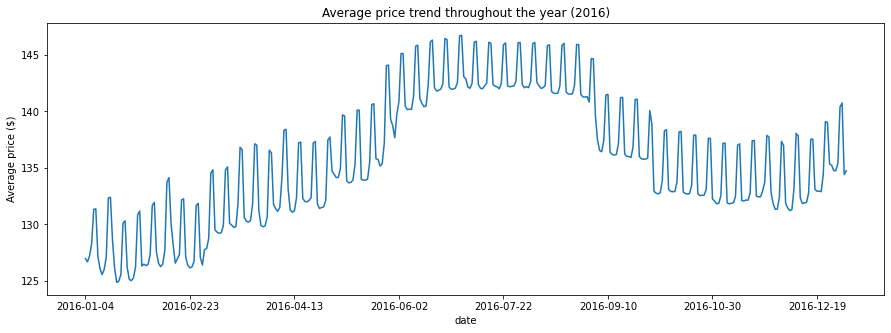

In [58]:
plt.figure(figsize=[15,5])
lst_calendar.groupby('date').mean()['price'].plot()
plt.title('Average price trend throughout the year (2016)')
plt.ylabel('Average price ($)');

In [59]:
# Derive the month from the date, and convert it into abbreviated month name.
#https://www.studytonight.com/python-howtos/how-to-get-month-name-from-month-number-in-python

lst_calendar['Month'] = pd.DatetimeIndex(lst_calendar['date']).month
lst_calendar['Month'] = pd.to_datetime(lst_calendar['Month'], format='%m').dt.month_name().str.slice(stop=3)

In [60]:
# Convert the Month column from object type into an ordered categorical type.
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
lst_calendar['Month'] = pd.Categorical(lst_calendar['Month'], categories=months, ordered=True)

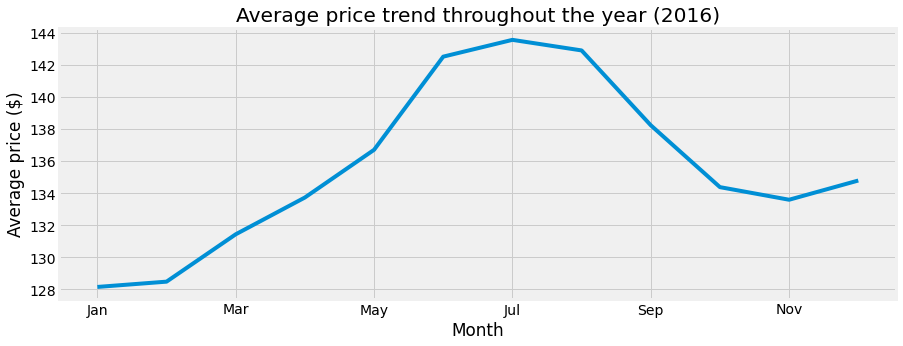

In [73]:
plt.figure(figsize=[15,5])

plt.style.use('fivethirtyeight')

lst_calendar.groupby('Month').mean()['price'].plot()
plt.title('Average price trend throughout the year (2016)')
plt.ylabel('Average price ($)');

The average price increases gradually from February month until reaches its peak In July and the price average starts to decrease from the end of August and then stat to increase in November. In particular, the average price is high between Jun and September. 

#### Is the availability of properties affected in the peak period?

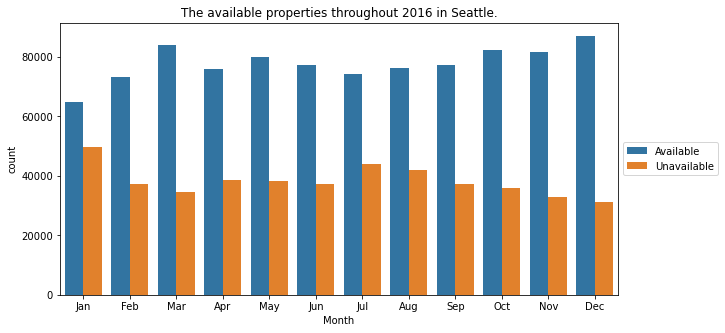

In [62]:
#plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=[10,5])

sns.countplot(data = lst_calendar, x = 'Month', hue = 'available')

plt.title('The available properties throughout 2016 in Seattle.')
plt.legend(['Available','Unavailable'], loc='center left', bbox_to_anchor=(1.0, 0.5));

The chart explains that the available property is more in March, October, November, and Dec months. <br/>
Although the months "June, July, August, and September" are peak season periods,  the available property still more than the unavailable property.

#### The correlation matrix

Plot the correlation matrix to see which variables are related to each other.

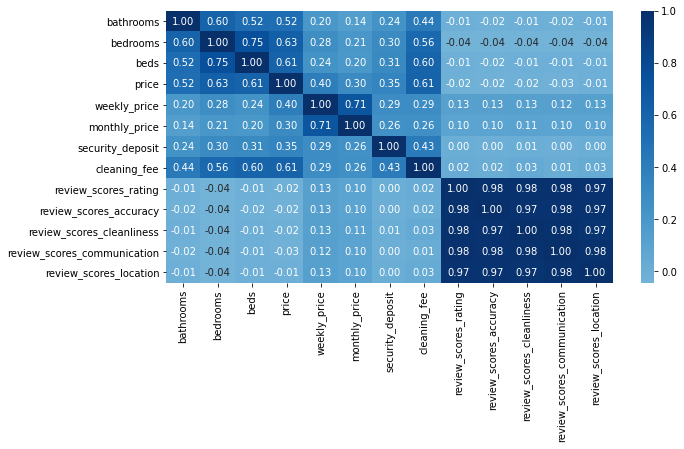

In [63]:
# reset parameters
#plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=[10,5])
sns.heatmap(df_list.corr(), annot= True, fmt= '.2f',cmap = 'Blues', center = 0);

The correlation matrix map explains a strong correlation between price, beds, bedrooms, bathrooms, and cleaning_fee columns. Also, it explains a moderate correlation between the previous columns and weekly_price, monthly_price, and security_deposit. Overmore, the five review columns have a strong correlation with each other.

### What are the most features that can influence the rental price in Seattle?

## Linear Regression

### Creating Dummy Variables.

In [64]:
def create_dummy_df(df, cat_cols, dummy_na):
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [65]:

#Pull a list of the column names of the categorical variables
cat_list = df_list.select_dtypes(include=['object']).columns

df_new = create_dummy_df(df_list, cat_list, dummy_na=False) 

# Show a header of df_new to check
print(df_new.shape)

(3292, 56)


### Modeling

In [66]:
#Split into explanatory and response variables
X = df_new.drop('price', axis=1)
y = df_new['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True) # Instantiate

#Fit the train data.
lm_model.fit(X_train, y_train) 

#Predict using our model.
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using our model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [67]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.6116840667919412.  The rsquared on the test data was 0.6829392810539003.


### Coefficients Weights
Calculating the coefficients weights in our model and inspecting their sizes that indicate the impact of each variable on the price. The larger the coefficient, the larger the expected impact on price.

In [74]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
39,property_type_Dorm,-162.285209,162.285209
33,property_type_Boat,101.459419,101.459419
48,room_type_Shared room,-55.926566,55.926566
21,neighbourhood_group_cleansed_Downtown,34.799063,34.799063
41,property_type_Loft,33.055567,33.055567
18,neighbourhood_group_cleansed_Cascade,31.262548,31.262548
47,room_type_Private room,-29.848836,29.848836
36,property_type_Camper/RV,29.313622,29.313622
0,bathrooms,28.187550,28.187550
20,neighbourhood_group_cleansed_Delridge,-27.755503,27.755503


In [84]:
# Select the 10th top of the features that can influence the rental price in Seattle.
df = coef_df[:10][['est_int','abs_coefs']]
df

,est_int,abs_coefs
39,property_type_Dorm,162.285209
33,property_type_Boat,101.459419
48,room_type_Shared room,55.926566
21,neighbourhood_group_cleansed_Downtown,34.799063
41,property_type_Loft,33.055567
18,neighbourhood_group_cleansed_Cascade,31.262548
47,room_type_Private room,29.848836
36,property_type_Camper/RV,29.313622
0,bathrooms,28.187550
20,neighbourhood_group_cleansed_Delridge,27.755503


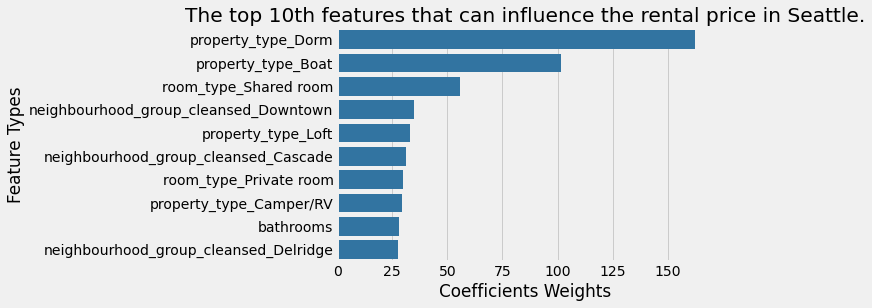

In [85]:
sns.barplot(data= df, y='est_int', x='abs_coefs', color = base_color)
plt.title("The top 10th features that can influence the rental price in Seattle.")
plt.xlabel("Coefficients Weights")
plt.ylabel("Feature Types");

The above chart shows the expected impact of features on price in descending order. The property type is the most influential factor, especially the Dormitory, Boat, and Loft types. Also, shared and private room types have a great impact on price. Downtown and Cascade neighborhoods have a noticeable impact on price.

## Conclusion
- The majority of hosts respond within a day and within a few house, and most of them are categorized as non-superhost.<br/>
- As can be seen from the analysis, Downtown and Capitol Hill are the most popular neighborhoods in Seattle.<br/>
- Neighborhoods can affect the rental price, where Magnolia, Downtown, Queen Anne, Cascade, and West Seattle neighborhoods are more expensive than the others.<br/>
- Most guests prefer to rent a house or apartment, and the boat is the most expensive rental property of all types and the tent is the cheapest.<br/>
- The majority of guests prefer to rent an entire house or apartment even though the entire house and apartment are more expensive than the other types.<br/>
- The most expensive type of cancellation policy (the strict type), the most requested by the guests.<br/>
- The average price in Seattle becomes high between June and September, which is reasonable because people prefer to travel during these months for tourism, so the demand for rentals increases.<br/>
- Although the properties in peak season periods are in demand, there is still plenty of properties available.<br/>
- Finally, the most anticipated impact of features on price are property type (Dormitory, Boat, and Loft ), room type (shared and private), as well as neighborhoods( Downtown and Cascade) that have a noticeable impact on price.<br/>